In [1]:
import gensim


In [2]:
model = gensim.models.doc2vec.Doc2Vec.load('./doc2vec.model')

In [3]:
model.most_similar("consumers")

[('ratepayers', 0.8965468406677246),
 ('generators', 0.8950929641723633),
 ('californians', 0.8911816477775574),
 ('customers', 0.8845396041870117),
 ('creditors', 0.8787999153137207),
 ('they', 0.873685896396637),
 ('people', 0.8679831624031067),
 ('we', 0.8646568059921265),
 ('you', 0.8571075797080994),
 ('them', 0.8545169234275818)]

In [4]:
model["consumers"]

array([ 1.43608892,  1.20622063, -0.17744489,  0.34571466, -0.69409168,
       -0.25967735, -0.989268  , -1.80468082, -0.3776795 ,  0.46954814,
        0.46956322, -1.04714072,  0.074634  , -1.59901011,  0.43375579,
       -1.70635235,  1.55660629, -0.17459053,  1.53616738,  0.57614553,
       -0.41356179,  0.17913105,  0.41943091,  0.06075543,  3.13254714,
       -1.42802286, -0.53954422,  2.58926821,  0.24616905,  0.3336007 ,
        0.10478482,  0.39093485, -0.10311677,  2.80891538,  0.41593355,
       -0.13067906, -0.60595006,  0.93170989, -0.13175488, -0.53326964,
        1.06172884,  0.98270369,  0.39560652,  0.08506826,  0.06677336,
       -1.36935866, -0.3364166 ,  0.04018042,  0.61708325, -1.32782972], dtype=float32)

In [5]:
vec = model.infer_vector([word.strip().lower() for word in "how are you?".split()])

In [6]:
vec

array([-0.02489191, -0.24315105, -0.37474695, -0.30309513,  0.14062801,
       -0.04590834, -0.02237172, -0.20799097, -0.02204086, -0.16165029,
       -0.03071633,  0.03707   , -0.03127963, -0.52773827, -0.20217128,
        0.27846026, -0.39381051,  0.20985432, -0.07067437,  0.12358898,
       -0.29149878, -0.18287149, -0.05009254,  0.12539028,  0.19884937,
       -0.00723838, -0.10635407,  0.25093827,  0.19553295, -0.07185335,
       -0.09912375, -0.05770491,  0.24150255,  0.02815007,  0.00392238,
        0.06275655, -0.05045423, -0.04854261, -0.07229065, -0.30935362,
       -0.11301787, -0.39164791, -0.21087721, -0.23294169, -0.39227667,
       -0.10266583, -0.0074482 , -0.00597723, -0.15407158, -0.07773944], dtype=float32)

In [7]:
model.wmdistance(["how", "s"],["what"])

2.841460704803467

In [10]:
import re
def load_file_to_process(path_to_file):
    with open(path_to_file, mode="r", encoding="ISO-8859-1") as file:
        lines = file.readlines()

    #nltk.download()

    pattern = r"^([A-Z]*):[a-z]* (.*)"

    input_x = []
    input_y = []
    for line in lines:
        matchObj = re.match(pattern, line.strip())
        input_x.append(matchObj.group(2))
        input_y.append(matchObj.group(1))

    mapping = {'ABBR' : [1,0,0,0,0,0], 
               'DESC' : [0,1,0,0,0,0],
               'ENTY' : [0,0,1,0,0,0],
               'HUM' : [0,0,0,1,0,0],
               'LOC' : [0,0,0,0,1,0],
               'NUM' : [0,0,0,0,0,1]}
    
    mapping2 = {'ABBR' : 0, 
               'DESC' : 1,
               'ENTY' : 2,
               'HUM' : 3,
               'LOC' : 4,
               'NUM' : 5}
    
    y_train = input_y
    x_train = input_x
    return x_train, y_train

In [13]:
X , Y = load_file_to_process("./train_5500.label")

In [14]:
import sys
import codecs
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

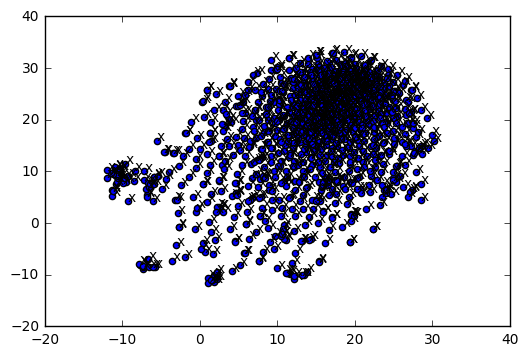

In [22]:
wv = []
vocabulary = []
for x in X[:1000]:
    wv.append(model.infer_vector([word.strip().lower() for word in x.split()]))
    vocabulary.append(x)

tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(wv)

plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(vocabulary, Y[:, 0], Y[:, 1]):
    plt.annotate("x", xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()